# 계단 함수 구현하기

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [6]:
def step_function(x):
    y = x > 0
    return y.astype(np.int) # astype -> ()안에 든 형태로 형변환을 할 때 사용

step_function('a')

TypeError: '>' not supported between instances of 'str' and 'int'

In [9]:
x = np.array([-1.0, 1.0, 2.0])
#x
# 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 가각에 부등호 연산을  수행한 bool 배열이 생성됨
# 이 코드는 배열 x의 원소 각각이 0보다 크면 True, 0이하면 False로 변환한 새로운 배열 y를 생성함
# y는 bool배열이다. 하지만 우리가 원하는 계단 함수는 0이나 1의 'int형'을 반환하는 함수이므로 배열 y의 원소를 bool에서 int로 바꿔준다
y = x > 0
#y
y = y.astype(np.int) #fale, true를 0, 1로 변환
y


array([0, 1, 1])

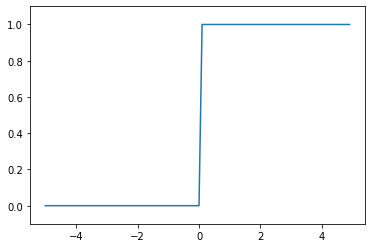

In [13]:
def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

# 시그모이드 함수 구현하기

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

# 이 함수가 넘파이 배열을 처리할 수 있는 이유는 넘파이의 브로드캐스트에 있다.
# 브로두캐스트는 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것이다.
# 스칼라는 하나의 실수값으로 이루어진 데이터를 말한다. 또한 스칼라값을 0차원 텐서라고 한다. 

array([0.26894142, 0.73105858, 0.88079708])

In [16]:
t = np.array([1.0, 2.0, 3.0])
#1.0 + t
1.0 / t


array([1.        , 0.5       , 0.33333333])

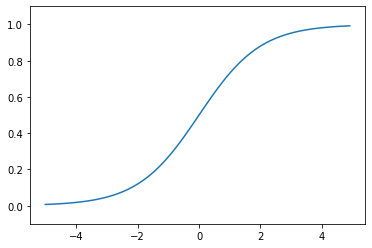

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y값 범위 지정
plt.show()

# ReLU 함수

In [ ]:
def relu(x):
    return np.maximun(0, x)

# 다차원 배열

In [5]:
A = np.array([1,2,3,4])
#print(A)
#np.ndim(A) # 몇 차원 배열인지 알려줌, 배열의 차원수를 알 수 있다
A.shape     # 배열의 형상을 알려줌, 튜플로 반환
A.shape[0]

4

In [7]:
B = np.array([[1,2], [3,4], [5,6]])
#print(B)
np.ndim(B)
B.shape

# 여기서는 3 X 2 배열을 작성함. 원소가 3개, 다음 차원에는 원소가 2개 있다는 의미이다.
# 2차원 배열은 특히 행렬이라고 부른다.

2

# 행렬의 곱

In [10]:
A = np.array([[1,2], [3,4]])
#A.shape
B = np.array([[5,6], [7,8]])
#B.shape
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [11]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
np.dot(A,B)

# 2 X 3 과 3 X 2의 행렬 곱은 이와 같이 구현할 수 있다.
# 이때 행렬의 형상에 주의해야 한다. 
# A의 1번째 원소 수와 B의 0번째 원소 수(행 수)가 같아야 한다.

array([[22, 28],
       [49, 64]])

# 신경망에서의 행렬 곱

In [20]:
X = np.array([1,2])
X.shape
W = np.array([[1,3,5], [2,4,6]])
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2, 3)
[ 5 11 17]


# 3층 신경망 구현하기

In [30]:
# 입력층에서 1층으로의 신호 전달 과정 구현
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [32]:
# 1층에서 2층으로의 신호 전달 과정
# 1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하고 위의 구현과 동일

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [33]:
def identity_function(x):     # 입력을 그대로 출력하는 항등함수
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

# 구현 정리

In [34]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


# 항등함수와 소프트맥스 함수 구현하기

In [38]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [40]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

# 소프트맥스 함수 개선

In [43]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

c = np.max(a)
a - c

np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [44]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y
